In [46]:
from google.colab import files
uploaded=files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


In [47]:
import pandas as pd
titanic_data=pd.DataFrame(pd.read_csv('Titanic-Dataset.csv'))

Understanding the Dataset

In [48]:
# Display the first few rows
print(titanic_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [49]:
# Display basic information about the dataset
print(titanic_data.info())
print(titanic_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [50]:
#checking for null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
# Handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)  # Cabin has too many missing values


In [52]:
# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

# Drop irrelevant columns
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Display the cleaned dataset
print(titanic_data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    1  38.0      1      0  71.2833        True       False   
2         1       3    1  26.0      0      0   7.9250       False       False   
3         1       1    1  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [68]:
from sklearn.model_selection import train_test_split
# Define features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (712, 9), Test set: (179, 9)


**Training** the Model

In [69]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       103
           1       0.79      0.78      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[87 16]
 [17 59]]


Visualizing the results

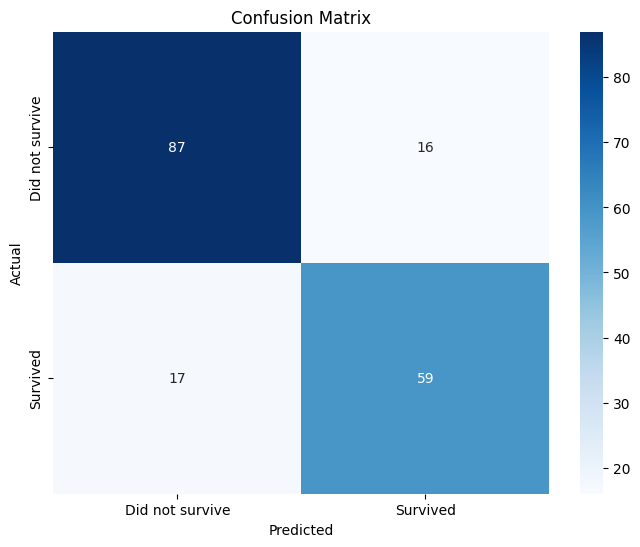

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [76]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])

# Print precision, recall, and F1 score for each class
print("Precision, Recall, and F1 Score:")
print(f"Class 0 (Did not survive): Precision = {precision[0]:.2f}, Recall = {recall[0]:.2f}, F1 Score = {f1[0]:.2f}")
print(f"Class 1 (Survived): Precision = {precision[1]:.2f}, Recall = {recall[1]:.2f}, F1 Score = {f1[1]:.2f}")


Precision, Recall, and F1 Score:
Class 0 (Did not survive): Precision = 0.84, Recall = 0.84, F1 Score = 0.84
Class 1 (Survived): Precision = 0.79, Recall = 0.78, F1 Score = 0.78


***Class 0 (Did not survive):***

**Precision (0.84)**: Out of all instances predicted as Did not survive, 84% were correctly classified.

**Recall (0.84)**: Of all actual Did not survive instances, 84% were correctly identified by the model.

**F1 Score (0.84)**: This is the harmonic mean of precision and recall, indicating a balanced performance for this class.

***Class 1 (Survived):***

**Precision (0.79)**: Out of all instances predicted as Survived, 79% were correctly classified.

**Recall (0.78)**: Of all actual Survived instances, 78% were correctly identified by the model.

**F1 Score (0.78)**: This is the harmonic mean of precision and recall, reflecting the model’s overall performance for this class.

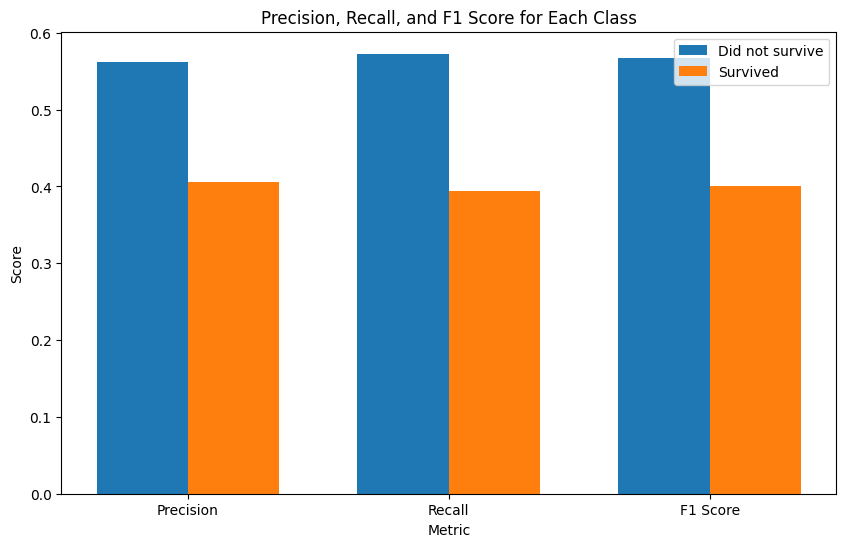

In [74]:
# Calculate and print precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, labels=[0, 1])

# Plot precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
class_0_metrics = [precision[0], recall[0], f1[0]]
class_1_metrics = [precision[1], recall[1], f1[1]]

x = np.arange(len(metrics))
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, class_0_metrics, width, label='Did not survive')
plt.bar(x + width/2, class_1_metrics, width, label='Survived')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score for Each Class')
plt.xticks(x, metrics)
plt.legend()
plt.show()